In [159]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [209]:
flat_chess = cv2.imread("../DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

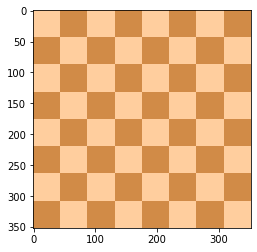

In [210]:
plt.imshow(flat_chess, "gray")

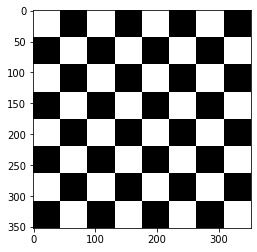

In [212]:
flat_chess_gray = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(flat_chess_gray, "gray")

In [213]:
real_chess = cv2.imread("../DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

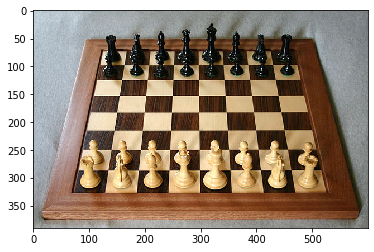

In [214]:
plt.imshow(real_chess)

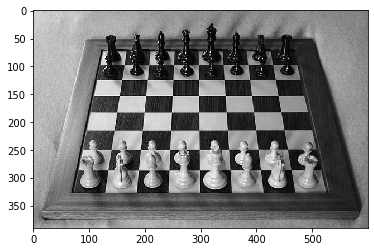

In [215]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, "gray")

In [219]:
gray = np.float32(flat_chess_gray)

In [220]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [221]:
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

In [222]:
flat_chess[dst>0.01*dst.max()]=[255,0,0]

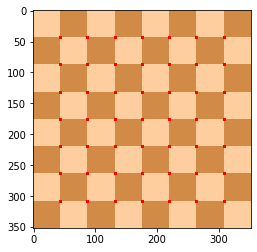

In [223]:
plt.imshow(flat_chess, "gray")

In [224]:
gray = np.float32(gray_real_chess)

In [225]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

In [226]:
dst = cv2.dilate(dst, None)

In [227]:
real_chess[dst>0.01*dst.max()] = [255, 0, 0]

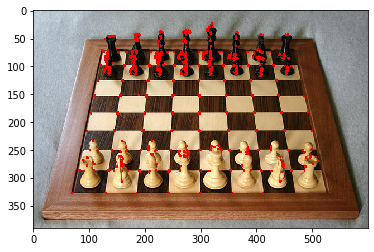

In [228]:
plt.imshow(real_chess)

In [229]:
flat_chess = cv2.imread("../DATA/flat_chessboard.png")
real_chess = cv2.imread("../DATA/real_chessboard.jpg")

flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
flat_chess_gray = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

In [233]:
corners = cv2.goodFeaturesToTrack(flat_chess_gray, 32, 0.01, 10)

In [234]:
corners = np.int0(corners)

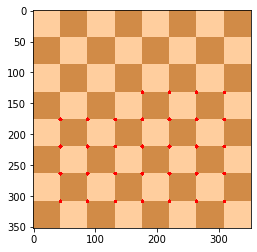

In [235]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)
plt.imshow(flat_chess)

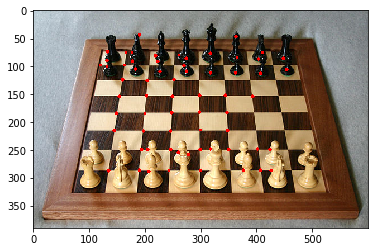

In [237]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 64, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)
plt.imshow(real_chess)